## **2장 시작하기 전에: 신경망의 수학적 구성 요소**

## **2.1 신경망과의 첫 만남**

**지금 풀려는 문제는 흑백 손글씨 숫자 이미지(28X28)를 10개의 범주(0~9)로 분류하는 것이다.**

> **머신 러닝에서 분류 문제의 범주(category)를 클래스(class)라 한다. 데이터 포인트는 샘플(sample)이라 한다. 특정 샘플의 클래스는 레이블(label)이라한다.**

In [36]:
from keras.datasets import mnist

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

**train_images와 train_labels가 모델이 학습해야 할 훈련 세트(training set)를 구성한다. 모델은 test_images와 test_labels로 구성된 테스트 세트(test set)에서 테스트 될 것이다.**

**모델은 test_images와 test_labels로 구성된 테스트 세트(test set)에서 테스트될 것이다.**

**이미지는 넘파이 배열로 인코딩되어 있고 레이블은 0부터 9까지의 숫자 배열이다.**

> **이미지와 레이블은 일대일 관계이다.**

In [37]:
train_images.shape # 60,000개의 샘플과 28x28 = 784개의 feature

(60000, 28, 28)

In [38]:
len(train_images) # 샘플 수

60000

In [39]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [40]:
test_images.shape

(10000, 28, 28)

In [41]:
len(test_images)

10000

In [42]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

**머신러닝 작업 순서는 다음과 같다.**

> **1. 작업 순서는 다음과 같다. 먼저 훈련 데이터 train_images와 train_labels를 네트워크에 주입**

> **2. 네트워크는 이미지와 레이블을 연관시킬 수 있도록 학습**

> **3. 마지막으로 test_images에 대한 예측을 네트워크에 요청**

> **4. 이 예측이 test_labels와 맞는지 확인**

**신경망의 핵심 구성 요소는 일종의 데이터 처리 필터라고 생각할 수 있는 층(layer)이다. 어떤 데이터가 들어가면 더 유용한 형태로 출력된다.**

> **조금 더 구체적으로 층은 주어진 문제에 더 의미 있는 표현(representation)을 입력된 데이터로부터 추출한다.**

**대부분의 딥러닝은 간단한 층을 연결하여 구성되어 있고, 점진적으로 데이터를 정제하는 형태를 띠고 있다. 딥러닝 모델은 데이터 정제 필터(층)가 연속되어 있는 데이터 프로세싱을 위한 여과기와 같다.**

In [43]:
from keras import models
from keras import layers

**이 예에서는 조밀하게 연결된 (또는 완전 연결(fully connected)된) 신경망 층인 Dense 층 2개가 연속되어 있다.**

**두 번째 (즉 마지막) 층은 10개의 확률 점수가 들어 있는 배열(모두 더하면 1이다.)을 반환하는 소프트맥스(softmax) 층이다.**

**각 점수는 현재 숫자 이미지가 10개의 숫자 클래스 중 하나에 속할 확률이다.**

In [44]:
network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,))) 
network.add(layers.Dense(10,activation='softmax')) # 출력층 softmax

**신경망이 훈련 준비를 마치기 위해서 컴파일 단계에 포함될 세 가지가 더 필요하다.**

> **compile() 메서드는 케라스가 씨아노의 래퍼(wrapper) 라이브러리로 시작되었음을 보여 주는 흔적이다. 기본 백엔드(backend)인 텐서플로에서는 옵티마이저와 손실 함수, 측정 지표를 연결하여 계산 그래프(computation graph) 구성을 마무리하는 과정을 수행한다.**

> **1. 손실 함수(loss function): 훈련 데이터에서 신경망의 성능을 측정하는 방법으로 네트워크가 옳은 방향으로 학습될 수 있도록 도와준다.**

> **2. 옵티마이저(optimizer): 입력된 데이터와 손실 함수를 기반으로 네트워크를 업데이트하는 메커니즘이다.**

> **3. 훈련과 테스트 과정을 모니터링할 지표: 여기에서는 정확도(정확히 분류된 이미지의 비율)만 고려한다.**

In [45]:
network.compile(optimizer='rmsprop', # 최적화 rmse
               loss = 'categorical_crossentropy', # cross_entropy
               metrics = ['accuracy']) # accuracy

**훈련을 시작히기 전에 데이터를 네트워크에 맞는 크기로 바꾸고 모든 값을 0과 1사이로 스케일을 조정한다.**

> **예를 들어 앞서 우리의 훈련 이미지는 [0,255] 사이의 값인 uint8 타입의 (60000,28,28) 크기를 가진 배열로 저장되어 있다. 이 데이터를 0과 1사이의 값을 가지는 float32 타입의 (60000, 28 * 28)크기인 배열로 바꾼다.**

In [46]:
train_images = train_images.reshape((60000,28*28)) # 이미지를 28X28 reshape
train_images = train_images.astype('float32') / 255 # 0 ~ 1 scale 조정

In [47]:
test_images = test_images.reshape((10000,28*28)) # 이미지를 28X28 reshape
test_images = test_images.astype('float32') / 255 # 0 ~ 1 scale 조정

In [48]:
from keras.utils import to_categorical

In [49]:
train_labels = to_categorical(train_labels) # label을 categorical(one-hot)으로 변경
test_labels = to_categorical(test_labels) # label을 categorical(one-hot)으로 변경

In [50]:
network.fit(train_images,train_labels,epochs=5,batch_size=128) # model train

Epoch 1/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.2547 - accuracy: 0.9259
Epoch 2/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.1034 - accuracy: 0.9696
Epoch 3/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0675 - accuracy: 0.9805
Epoch 4/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0496 - accuracy: 0.9848
Epoch 5/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.0372 - accuracy: 0.9890


In [51]:
test_loss, test_acc = network.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 41us/step


In [52]:
print('test_acc:',test_acc)

test_acc: 0.9797999858856201


**테스트 세트의 정확도는 약 98%로 나왔다. 훈련 세트 정확도보다는 약간 낮다. 훈련 정확도와 테스트 정확도 사이의 차이는 과대적합(Overfitting) 때문이다.**

> **이는 머신 러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 경향을 말한다.**

## **2.2 신경망을 위한 데이터 표현**

**최근의 모든 머신 러닝 시스템은 일반적으로 텐서를 기본 데이터 구조로 사용해왔다.**

> **텐서는 머신 러닝의 기본 구성 요소이다.**

**핵심적으로 텐서는 데이터를 위한 컨테이너이다. 거의 항상 수치형 데이터를 다루므로 숫자를 위한 컨테이너이다.**

> **텐서는 임의의 차원 개수를 가지는 행렬의 일반화된 모습이다.(텐서에서는 차원(dimension)을 종종 축(axis)이라고 부른다.)**

![test](./img/텐서서.png)

### **2.2.1 스칼라(0D 텐서)**

**하나의 숫자만 담고 있는 텐서를 스칼라(scalar)(또는 스칼라 텐서, 0차원 텐서, 0D 텐서)라고 부른다.**

> **넘파이에서는 float32나 float64 타입의 숫자가 스칼라 텐서(또는 배열 스칼라(array scalar))이다.**

**ndim 속성을 사용하면 넘파이 배열의 축 개수를 확인할 수 있다. 스칼라 텐서의 축 개수는 0이다.**

In [20]:
import numpy as np

In [21]:
x = np.array(12)

In [22]:
x.ndim

0

### **2.2.2 벡터(1D 텐서)**

**숫자의 배열을 벡터(vector) 또는 1D 텐서라고 부른다. 1D 텐서는 딱 하나의 축을 가진다.**

**5D 벡터와 5D 텐서를 혼동하면 안된다. 5D 벡터는 하나의 축을 따라 5개의 차원을 가진 것이고 5D 텐서는 5개의 축을 가진 것이다.(텐서의 각 축을 따라 여러 개의 차원을 가진 벡터가 놓일 수 있다.)**

**차원수(dimensionality)는 특정 축을 따라 놓인 원소의 개수(5D 벡터와 같은 경우)이거나 텐서의 축 개수(5D 텐서와 같은 경우)를 의미하므로 가끔 혼동하기 쉽다.**

> **후자의 경우 랭크 5인 텐서라고 말하는 것이 기술적으로 좀 더 정확하다.(텐서의 랭크가 축의 개수이다.)**

In [23]:
x = np.array([12,3,6,14,7])

In [24]:
x.shape

(5,)

In [25]:
x.ndim

1

### **2.2.3 행렬(2D 텐서)**

**벡터의 배열이 행렬(Matrix) 또는 2D 텐서이다. 행렬에는 2개의 축이 있다.(보통 행(row)과 열(column)이라고 부른다.)**

> **행렬은 숫자가 채워진 사각 격자라고 생각할 수 있다.**

**첫 번째 축에 놓여 있는 원소를 행이라 부르고, 두 번째 축에 놓여 있는 원소를 열이라 부른다.**

In [26]:
# 첫번째 축에 놓여 있는 원소([1,2,3],[4,5,6])을 행
# 두번째 축에 놓여 있는 원소([1,4],[2,5],[3,6])을 열
x = np.array([[1,2,3],
             [4,5,6]])

In [27]:
x.shape

(2, 3)

In [28]:
x.ndim

2

### **2.2.4 3D 텐서와 고차원 텐서**

**이런 행렬들을 하나의 새로운 배열로 합치면 숫자가 채워진 직육면체 형태로 해석할 수 있는 3D 텐서가 만들어진다.**

**딥러닝에서는 보통 0D에서 4D까지의 텐서를 다룬다. 동영상 데이터를 다룰 경우에는 5D 텐서까지 가기도 한다.**

In [29]:
x = np.array([[[1,1,1,1,1],
              [5,5,5,5,5],
              [3,3,3,3,3]],
             [[2,2,2,2,2],
             [6,6,6,6,6],
             [7,7,7,7,7]],
             [[1,2,3,3,3],
             [1,1,1,1,1],
             [3,3,3,3,3]]])

In [30]:
x.shape

(3, 3, 5)

In [31]:
x.ndim

3

### **2.2.5 핵심 속성**

**텐서는 3개의 핵심 속성으로 정의된다.**

> **1. 축의 개수(랭크): 예를 들어 3D 텐서에는 3개의 축이 있고, 행렬에는 2개의 축이 있다. 넘파이 라이브러리에서는 ndim 속성에 저장되어 있다.**

> **2. 크기(shape): 텐서의 각 축을 따라 얼마나 많은 차원이 있는지를 나타낸 파이썬의 튜플(tuple)이다. 예를 들어 앞에 나온 행렬의 크기는 (3,5)이고 3D 텐서의 크기는 (3,3,5)이다. 벡터의 크기는 (5,)처럼 1개의 원소로 이루어진 튜플이다. 배열 스칼라는 ()처럼 크기가 없다.**

> **3. 데이터 타입(넘파이에서 dtype에 저장된다.): 텐서에 포함된 데이터의 타입이다. 예를 들어 텐서의 타입은 float32, uint8, float64 등이 될 수 있다. 드물게 char 타입을 사용한다. 텐서는 사전에 할당되어 연속된 메모리에 저장되어야 하므로 넘파이 배열으 (그리고 대부분 다른 라이브러리는) 가변 길이의 문자열을 지원하지 않는다.)**

In [1]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [3]:
# 이 배열은 8비트 정수형 3D 텐서이다.
# 좀 더 정확하게는 28x28 크기의 정수 행렬 6만 개가 있는 배열이다.
# 각 행렬은 하나의 흑백 이미지고, 행렬의 각 원소는 0에서 ~ 255 사이의 값을 가진다.
print('train_images dimension:',train_images.ndim)
print('train_images shape:',train_images.shape)
print('train_images dtype:',train_images.dtype)

train_images dimension: 3
train_images shape: (60000, 28, 28)
train_images dtype: uint8


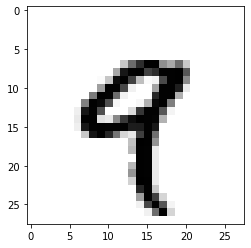

In [5]:
digit = train_images[4]

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

### **넘파이로 텐서 조작하기**

**이전 예제에서 train_images[i] 같은 형식으로 첫 번째 축을 따라 특정 숫자를 선택했다. 배열에 있는 특정 원소들을 선택하는 것을 슬라이싱(slicing)이라고 한다.**

In [7]:
# 다음 예는 11번째에서 100번째까지 숫자를 선택하여 (90,28,28)
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [8]:
# 동일하지만 조금 더 자세한 표기법은 각 배열의 축을 따라 슬라이싱의 시작 인덱스와 마지막 인덱스를 지정 :(콜론)은 전체 인덱스를 선택한다.
my_slice = train_images[10:100,:,:]
my_slice.shape

(90, 28, 28)

In [9]:
# 이전 예와 동일
my_slice = train_images[10:100,0:28,0:28]
my_slice.shape

(90, 28, 28)

In [11]:
# 일반적으로 각 배열의 축을 따라 어떤 인덱스 사이도 선택할 수 있다.
# 예를 들어 이미지의 오른쪽 아래 14x14 픽셀을 선택하려면 다음과 같이 한다.
my_slice = train_images[:,14:,14:]
my_slice.shape

(60000, 14, 14)

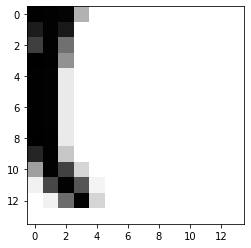

In [12]:
digit = my_slice[4]

plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [15]:
# 음수 인덱스도 사용할 수 있다.
# 파이썬 리스트의 음수 인덱스와 마찬가지로 현재 축의 끝에서 상대적인 위치를 나타낸다.
# 정중앙에 위치한 14x14 픽셀 조각을 이미지에서 잘라 내려면 다음과 같이 한다.
my_slice = train_images[:,7:-7,7:-7]
my_slice.shape

(60000, 14, 14)

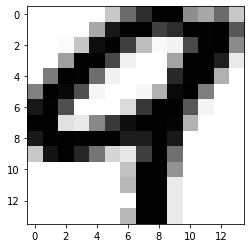

In [17]:
digit = my_slice[4]

plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

### **2.2.7 배치 데이터**

**일반적으로 딥러닝에서 사용하는 모든 데이터 텐서의 첫 번째 축(인덱스가 0부터 시작하므로 0번째 축)은 샘플 축(sample axis)이다. (이따금 샘플 차원(sample dimension)이라고도 부른다.)**

**딥러닝 모델은 한 번에 전체 데이터셋을 처리하지 않는다. 그 대신 데이터를 작은 배치(batch)로 나눈다. 구체적으로 말하면 MNIST 숫자 데이터에서 크기가 128인 배치 하나는 다음과 같다.**

In [18]:
batch_1 = train_images[:128] # 첫번째 배치
batch_2 = train_images[128:256] # 두번째 배치

**이런 배치 데이터를 다룰 때는 첫 번째 축(0번 축)을 배치 축(batch axis) 또는 배치 차원(batch dimension)이라고 부른다. 케라스나 다른 딥러닝 라이브러리를 사용할 때 이런 용어를 자주 만난다.**

### **2.2.8 텐서의 실제 사례**

**우리가 사용할 데이터는 대부분 다음 중 하나에 속할 것이다.**

> **벡터 데이터: (samples, features) 크기의 2D 텐서**

> **시계열 데이터 또는 시퀀스(sequence) 데이터: (sample, timesteps, features) 크기의 3D 텐서**

> **이미지: (samples, height, width, channels) 또는 (samples, channels, height, width) 크기의 4D 텐서**

> **동영상: (samples, frames, height, width, channels) 또는 (samples, frames, channels, height, width) 크기의 5D 텐서**

### **2.2.9 벡터 데이터**

**대부분의 경우에 해당된다. 이런 데이터 셋에서는 하나의 데이터 포인트가 벡터로 인코딩될 수 있으므로 배치 데이터는 2D 텐서로 인코딩될 것이다.(즉 벡터의 배열이다.) 여기서 첫 번쨰 축은 샘플 축이고, 두 번째 축은 특성 축(feature axis)이다.**

> **사람의 나이, 우편 번호, 소득으로 구성된 인구 통계 데이터. 각 사람은 3개의 값을 가진 벡터로 구성되고 10만 명이 포함된 전체 데이터셋은 (100000, 3) 크기의 텐서에 저장될 수 있다.**

> **(공통 단어 2만 개로 만든 사전에서) 각 단어가 등장한 횟수로 표현된 텍스트 문서 데이터셋. 각 문서는 2만 개의 원소(사전에 있는 단어마다 하나의 원소에 대응한다.)를 가진 벡터로 인코딩 될 수 있다. 500개의 문서로 이루어진 전체 데이터셋은 (500, 20000)크기의 텐서로 저장된다.**

### **2.2.10 시계열 데이터 또는 시퀀스 데이터**

**데이터에서 시간이 (또는 연속된 순서가) 중요할 때는 시간 축을 포함하여 3D 텐서로 저장된다. 각 샘플은 벡터(2D 텐서)의 시퀀스로 인코딩되므로 배치 데이터는 3D 텐서로 인코딩될 것이다.**

![test](./img/시계열.jpg)

**관례적으로 시간 축은 항상 두 번째 축(인덱스가 1인 축)이다.**

> **주식 가격 데이터셋: 1분마다 현재 주식 가격, 지난 1분 동안에 최고 가격과 최소 가격을 저장한다. 1분마다 데이터는 3D 벡터로 인코딩되고 하루 동안 거래는 (390,3) 크기의 2D 텐서로 인코딩된다.(하루의 거래 시간은 390분이다.) 250일치의 데이터는 (250, 390, 3) 크기의 3D 텐서로 저장될 수 있다. 여기에서 1일치 데이터가 하나의 샘플이 된다.**

> **트윗 데이터셋: 각 트윗은 128개의 알파벳으로 구성된 280개의 문자 시퀀스이다. 여기에서는 각 문자가 128개인 크기인 이젠 벡터로 인코딩될 수 있다.(해당 문자의 인덱스만 1이고 나머지는 모두 0인 벡터). 그러면 각 트윗은 (280,128) 크기의 2D 텐서로 인코딩될 수 있다. 100만 개의 트윗으로 구성된 데이터셋은 (1000000, 280, 128) 크기의 텐서에 저장된다.**

### **2.2.11 이미지 데이터**

**이미지는 전형적으로 높이, 너비, 컬러 채널의 3차원으로 이루어진다. (MNIST 숫자처럼) 흑백 이미지는 하나의 컬러 채널만을 가지고 있어 2D 텐서로 저장될 수 있지만 관례상 이미지 텐서는 항상 3D로 저장된다.**

> **흑백 이미지의 경우 컬러 채널의 차원 크기는 1이다. 256x256 크기의 흑백 이미지에 대한 128개의 배치는 (128,256,256,1) 크기의 텐서에 저장될 수 있다.**

> **컬러 이미지에 대한 128개의 배치라면 (128,256,256,3) 크기의 텐서에 저장될 수 있다.**

![test](./img/이미지데이터.jpg)

**이미지 텐서의 크기를 지정하는 방식은 두 가지이다. (텐서플로에서 사용하는) 채널 마지막(channel-last) 방식과 (씨아노에서 사용하는) 채널 우선(channel-first) 방식이다.**

> **구글의 텐서플로 머신 러닝 프레임워크는 (samples, height, width, color_depth) 처럼 컬러 채널 깊이를 끝에 놓는다.**

> **씨아노는 (samples, color_depth, height, width) 처럼 컬러 채널의 깊이를 배치 축 바로 뒤에 놓는다.**

### **2.2.12 비디오 데이터**

**비디오 데이터는 현실에서 5D 텐서가 필요한 몇 안 되는 데이터 중 하나이다. 하나의 비디오는 프레임의 연속이고 각 프레임은 하나의 컬러 이미지이다. 프레임이 (height, width, color_depth)의 3D 텐서로 저장될 수 있기 때문에 프레임의 연속은 (frames, height, width, color_depth)의 4D 텐서로 저장될 수 있다.**

**여러 비디오 배치는 (samples, frames, height, width, color_depth)의 5D 텐서로 저장될 수 있다.**

> **예를 들어 60초짜리 144x256 유튜브 비디오 클립을 초당 4프레임으로 샘플링하면 240프레임이 된다. 이런 비디오 클립을 4개 가진 배치는 (4, 240, 144, 256, 3)크기의 텐서에 저장될 수 있다.**

## **2.3 신경망의 톱니바퀴: 텐서 연산**

**심층 신경망이 학습한 모든 변환을 수치 데이터 텐서에 적용하는 몇 종류의 텐서 연산(tensor operation)으로 나타낼 수 있다.**

In [ ]:
# 첫 번째 예제에서는 Dense 층을 쌓아서 신경망을 만들었다.
# 케라스의 층은 다음과 같이 생성한다.
# 이 층은 2D 텐서를 입력으로 받고 입력 텐서의 새로운 표현인 또 다른 2D 텐서를 반환하는 함수 처럼 해석할 수 있다.
keras.layers.Dense(512, activation='relu')

In [ ]:
# 구체적으로 보면 이 함수는 다음과 같다.(W는 2D 텐서고, b는 벡터이다. 둘 모두 층의 속성이다.)
# 여기에는 3개의 텐서 연산이 있다.
# 입력 텐서와 텐서 W사이의 점곱(dot), 점곱의 결과인 2D 텐서와 벡터 b 사이의 덧셈(+), 마지막으로 relu(렐루) 연산이다.
# relu(x)는 max(x,0)이다.
output = relu(dot(W,input)+b)

### **2.3.1 원소별 연산**

**relu 함수와 덧셈은 원소별 연산(element-wise operation)이다. 이 연산은 텐서에 있는 각 원소에 독립적으로 적용된다. 이 말은 고도의 병렬 구현이 가능한 연산이라는 의미이다.**

In [42]:
def naive_relu(x):
    assert len(x.shape) == 2 # 차원을 반환 / X가 2D가 아닌 경우 오류 출력
    
    x = x.copy() # 입력 텐서 자체를 바꾸지 않도록 복사
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j],0) # 행렬의 각 원소와 0을 비교하여 최대값 반환
    return x

In [52]:
def naive_add(x,y):
    assert len(x.shape) == 2
    assert x.shape == y.shape # 행렬의 덧셈은 shape이 같아야함
    
    x = x.copy()
    
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[i,j]
    return x

**넘파이는 시스템에 설치된 BLAS 구현에 복잡한 일들을 위임한다. 따라서 넘파이 배열을 다룰 때는 넘파이 내장 함수로 이런 연산들을 쉽게 처리할 수 있다.**

**넘파이는 시스템에 설치된 BLAS(Basic Linear Algebra Subprogram) 구현에 복잡한 일들을 위임한다.**

> **BLAS는 고도로 병렬화되고 효율적인 저수준의 텐서 조작 루틴이며, 전형적으로 포트란이나 C언어로 구현되어 있다.**

In [21]:
import numpy as np

In [22]:
x = np.array([[1,-2,3],[-4,5,6]])
y = np.array([[1,-1,1],[-1,1,1]])

In [23]:
z = x + y # 원소별 덧셈

In [24]:
np.maximum(z,0.) # 원소별 렐루 함수

array([[2., 0., 4.],
       [0., 6., 7.]])

### **2.3.2 브로드 캐스팅**

**크기가 다른 두 텐서가 더해질 때 모호하지 않고 실행 가능하면 작은 텐서가 큰 텐서의 크기에 맞추어 브로드캐스팅(broadcasting)된다.**

> **1. 큰 텐서의 ndim에 맞도록 작은 텐서에 (브로드캐스팅 축이라고 부르는)축이 추가된다.**

> **2. 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞도록 반복된다.**

**X의 크기는 (32,10)이고 y의 크기는 (10,)라고 가정한다. 먼저 y에 비어 있는 첫 번째 축을 추가하여 크기를 (1,10)으로 만든다. 그런 다음 y를 이 축에 32번 반복하면 텐서 Y의 크기는 (32,10)이 된다. 여기에서 Y[i,:] == y for i in range(0,32)이다. 이제 X와 Y의 크기가 같으므로 더할 수 있다.**

In [25]:
def naive_add_matrix_and_vector(x,y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[j]
    return x

In [28]:
x = np.array([[1,2,3],[4,5,6]])
y = np.array([1,2,3])
print(x.shape)
print(y.shape)

(2, 3)
(3,)


In [27]:
naive_add_matrix_and_vector(x,y)

array([[2, 4, 6],
       [5, 7, 9]])

In [29]:
x = np.random.random((64,3,32,10))
y = np.random.random((32,10))

In [30]:
z = np.maximum(x,y)

In [31]:
z.shape

(64, 3, 32, 10)

### **2.3.3 텐서 점곱**

**텐서 곱셈(tensor product)이라고도 부르는(원소별 곱셈과 혼동하지 마세요) 점곱 연산(dot operation)은 가장 널리 사용되고 유용한 텐서 연산이다.**

**넘파이, 케라스, 씨아노, 텐서플로에서 원소별 곱셈은 * 연산자를 사용한다. 텐서플로에서는 dot 연산자가 다르지만 넘파이와 케라스는 점곱 연산에 보편적인 dot 연산자를 사용한다.**

In [34]:
def naive_vector_dot(x,y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [35]:
x = np.array([1,2,3])
y = np.array([1,2,3])
# 여기서 볼 수 있듯이 두 벡터의 점곱은 스칼라가 되므로 원소 개수가 같은 벡터끼리 점곱이 가능하다.
naive_vector_dot(x,y)

14.0

In [43]:
# 행렬 x와 벡터 y 사이에서도 점곱이 가능하다.
# y와 x의 행 사이에서 점곱이 일어나므로 벡터가 반환된다.
import numpy as np
def naive_matrix_vector_dot(x,y):
    assert len(x.shape) == 2 # x는 넘파이 행렬
    assert len(y.shape) == 1 # y는 넘파이 벡터
    assert x.shape[1] == y.shape[0] # x의 두 번째 차원이 y의 첫 번째 차원과 같아야한다.
    
    z = np.zeros(x.shape[0]) # 이 연산은 x의 행과 같은 크기의 0이 채워진 벡터를 만든다.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i,j] * y[j]
    return z

In [45]:
x = np.array([[1,2,3],[4,5,6]])
y = np.array([1,2,3])
naive_matrix_vector_dot(x,y)

array([14., 32.])

In [46]:
# 행렬-벡터 점곱과 벡터-벡터 점곱 사이의 관계를 부각하기 위해 앞에서 만든 함수를 재사용한다.
def naive_matrix_vector_dot(x,y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i,:],y)
    return z

In [49]:
# 물론 점곱은 임의의 축 개수를 가진 텐서에 일반화된다.
# 가장 일반적인 용도는 두 행렬 가의 점곱일 것이다. x.shape[1] == y.shape[0]일 때 두 행렬 x와 y의 점곱(dot(x,y))이 성립된다.
# x의 열과 y의 행 사이에 벡터 점곱으로 인해 (x.shape[0], y.shape[1]) 크기의 행렬이 된다.

def naive_matrix_dot(x,y):
    assert len(x.shape) == 2 # x와 y는 넘파이 행렬이다.
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0] # x의 두 번째 차원이 y의 첫 번째 차원과 같아야한다.
    
    z = np.zeros((x.shape[0], y.shape[1])) # 이 연산은 0이 채워진 특정 크기의 벡터를 만든다.
    for i in range(x.shape[0]): # x의 행을 반복한다.
        for j in range(y.shape[1]): # y의 열을 반복한다.
            row_x = x[i,:]
            column_y = y[:,j]
            z[i,j] = naive_vector_dot(row_x, column_y)
    return z

In [50]:
x = np.array([[1,2,3],[4,5,6],[7,8,9]])
y = np.array([[1,2],[1,2],[1,2]])
naive_matrix_dot(x,y)

array([[ 6., 12.],
       [15., 30.],
       [24., 48.]])

In [51]:
np.dot(x,y)

array([[ 6, 12],
       [15, 30],
       [24, 48]])

![test](./img/점곱.jpg)

### **2.3.4 텐서 크기 변환**

**꼭 알아 두어야 할 세 번째 텐서 연산은 텐서 크기 변환(tensor reshaping)이다.**

**첫 번째 신경망 예제의 Dense 층에서는 사용되지 않지만 신경망에 주입할 숫자 데이터를 전처리할 때 사용했다.**

In [52]:
train_images = train_images.reshape((60000,28*28))
train_images.shape

(60000, 784)

**텐서의 크기를 변환한다는 것은 특정 크기에 맞게 열과 행을 재배열한다는 뜻이다.**

> **당연히 크기가 변환된 텐서는 원래 텐서와 원소 개수가 동일하다**

In [68]:
x = np.array([[1,2,3],[4,5,6]])

In [69]:
x.shape

(2, 3)

In [70]:
x.reshape(3,2) # Transpose

array([[1, 2],
       [3, 4],
       [5, 6]])

In [72]:
x.reshape(2,1,3)

array([[[1, 2, 3]],

       [[4, 5, 6]]])

In [53]:
# 자주 사용하는 특별한 크기 변환은 전치(transposition)이다.
# 행렬의 전치는 행과 열을 바꾸는 것을 의미한다. 즉 x[i,:]이 x[:,i]가 된다.
x = np.zeros((300,20))
x = np.transpose(x)
print(x.shape)

(20, 300)


### **2.3.5 텐서 연산의 기하학적 해석**

**텐서 연산이 조작하는 텐서의 내용은 어떤 기하학적 공간에 있는 좌표 포인트로 해석될 수 있기 떄문에 모든 텐서 연산은 기하학적 해석이 가능하다.**

> **예를 들어 덧셈을 생각할때, 다음 벡터를 먼저 본다.**

**A = [0.5,1]**

![test](./img/벡터터.png)

**새로운 포인트 B = [1, 0.25]를 이전 벡터에 더해 본다. 기하하적으로는 벡터 화살표를 연결하여 계산할 수 있다.**

> **최종 위치는 두 벡터의 덧셈을 나타내는 벡터가 된다.**

![test](./img/덧셈.png)

**일반적으로 아핀 변환(affine transformation), 회전 스케일링(scaling) 등 처럼 기본적인 기하학적 연산은 텐서 연산으로 표현될 수 있다.**

> **아핀 변환은 점, 직선, 평면을 보존하는 아핀 공간으로의 변환이다. 이 변환은 거리의 비율과 직선의 평행을 유지하는 이동, 스케일링, 회전 등이 포함된다.**

### **2.3.6 딥러닝의 기하학적 해석**

**신경망은 전체적으로 텐서 연산의 연결로 구성된 것이고, 모든 텐서 연산은 입력 데이터의 기하학적 변환임을 배웠다. 단순한 단계들이 길게 이어져 구현된 신경망을 고차원 공간에서 매우 복잡한 기하학적 변환을 하는 것으로 해석할 수 있다.**

**기초적인 연산을 길게 연결하여 복잡한 기하학적 변환을 조금씩 분해하는 방식이 마치 사람이 종이 공을 펼치기 위한 전략과 매우 흡사하기 때문에 심층 네트워크의 각 층은 데이터를 조금씩 풀어 주는 변환을 적용하므로, 이런 층을 깊게 쌓으면 아주 복잡한 분해 과정을 처리할 수 있다.**

## **2.4 신경망의 엔진: 그래디언트 기반 최적화**

**output = relu(dot(W,input)+b)**

**이 식에서 텐서 W와 b는 층의 속성처럼 볼 수 있다. 가중치(weight) 또는 훈련되는 파라미터(trainable parameter)라고 부른다.(각각 커널(kernel)과 편향(bias)이라고 부르기도 한다.) 이런 가중치에는 훈련 데이터를 신경망에 노출시켜서 학습된 정보가 담겨있다.**

**초기에는 가중치 행렬이 작은 난수로 채워져 있다.(무작위 초기화(random initalization) 단계라고 부른다.) 물론 W와 b가 난수일 때 relu(dot(W,input)+b)가 유용한 어떤 표현을 만들 것이라고 기대할 수는 없다. 즉 의미 없는 표현이 만들어진다. 하지만 이는 시작 단계일 뿐이다. 그다음에는 피드백 신호에 기초하여 가중치가 점진적으로 조정될 것이다. 이런 점진적인 조정 또는 훈련(training)이 머신 러닝 학습의 핵심이다.**

**훈련은 다음과 같은 훈련 반복 루프(training loop)안에서 일어난다.**

> **1. 훈련 샘플 x와 이에 사응하는 타깃 y의 배치를 추출한다.**

> **2. x를 사용하여 네트워크를 실행하고(정방향 패스(forward pass) 단계), 예측 y_pred를 구한다.**

> **3. y_pred와 y의 차이를 측정하여 이 배치에 대한 네트워크의 손실을 계산한다.**

> **4. 배치에 대한 손실이 조금 감소되도록 네트워크의 모든 가중치를 업데이트 한다.**

**결국 훈련 데이터에서 네트워크의 손실, 즉 예측 y_pred와 타깃 y의 오차가 매우 작아질 것이다.**

> **즉, 이 네트워크는 입력에 정확한 타깃을 매핑하는 것을 학습했다.**

**여기서 어려운 부분은 네트워크의 가중치를 업데이트하는 4단계이다.**

> **한 가지 간단한 방법은 네트워크 가중치 행렬의 원소를 모두 고정하고 관심 있는 하나만 다른 값을 적용해 보는 것이다.**

> **하지만 이러한 접근 방식은 모든 가중치 행렬의 원소마다 두 번의 정방향 패스를 계산해야 하므로 엄청 비효율적이다.(보통 수천에서 경우에 따라 수백만 개의 많은 가중치가 있기 떄문)**

**신경망에 사용된 모든 연산이 미분 가능(differentiable) 하다는 장점을 사용하여 네트워크 가중치에 대한 손실 그래디언트(gradient)를 계산하는 것이 훨씬 더 좋은 방법이다.**

> **그래디언트의 반대 방향으로 가중치를 이동하면 손실이 감소된다.**

## **2.4.1 변화율이란?**

**실수 x를 새로운 실수 y로 매핑하는 연속적이고 매끄러운 함수 f(x) = y를 생각해본다.**

> **이 함수가 연속적이므로 x를 조금 바꾸면 y가 조금만 변경될 것이다. 이것이 연속성의 개념이다.**

> **x를 작은 값 epsilon_x만큼 증가시켰을 때 y가 epsilon_y만큼 바뀐다고 말할 수 있다.**

**f(x+epsilon_x) = y + epsilon_y**

> **또 이 함수가 매끈하므로(곡선의 각도가 갑자기 바뀌지 않는다) epsilon_x가 충분히 작다면 어떤 포인트 p에서 기울기 a의 선형 함수로 f를 근사할 수 있다. 따라서 epsilon_y는 a * epsilon_x가 된다.**

**f(x+epsilon_x) = y + a * epsilon_x**

> **이 선형적인 근사는 x가 p에 충분히 가까울 때 유효하다.**

**이 기울기를 p에서 f의 변환율(derivative)이라고 한다. 이는 a가 음수일 때 p에서 양수 x만큼 조금 이동하면 f(x)가 감소한다는 것을 의미한다. a가 양수일 때는 음수 x만큼 조금 이동하면 f(x)가 감소된다. a의 절대값(변화율의 크기)은 이런 증가나 감소가 얼마나 빠르게 일어날지 알려준다.**

![test](./img/국부적근사.jpg)

**모든 미분 가능한(미분 가능하다는 것은 변화율을 유도할 수 있다는 의미로, 예를 들어 매끄럽고 연속적인 함수이다.) 함수 f(x)에 대해 x의 값을 f의 국부적인 선형 근사인 그 지점의 기울로 매핑하는 변화율 함수 f'(x)가 존재한다.**

**f(x)를 최소화하기 위해 epsilon_x만큼 x를 업데이트하고 싶을 때 f의 변화율을 알고 있으면 해결된다.**

> **변환율 함수는 x가 바뀜에 따라 f(x)가 어떻게 바뀔지 설명해준다. f(x)의 값을 감소시키고 싶다면 x를 변화율의 방향과 단대로 조금 이동해야한다.**

### **2.4.2 텐서 연산의 변화율: 그래디언트**

**그래디언트는 텐서 연산의 변화율이다. 이는 다차원 입력, 즉 텐서를 입력으로 받는 함수에 변화율 개념을 확장시킨 것이다.**

**입력 벡터 x, 행렬 W, 타깃 y와 손실 함수 loss가 있다고 가정한다. W를 사용하여 타깃의 예측 y_pred를 계산하고 손실, 즉 타깃 예측 y_pred와 타깃 y 사이의 오차를 계산할 수 있다.**

> **y_pred = dot(W,x)**

> **loss_value = loss(y_pred,y)**

**입력 데이터 x와 y가 고정되어 있다면 이 함수는 W를 손실 값에 매핑하는 함수로 볼 수 있다.**

> **loss_value = f(W)**

**W의 현재 값을 W0라고 가정하면 포인트 W0에서 f의 변화율은 W와 같은 크기의 텐서인 gradient(f)(W0)이다. 이 텐서의 각 원소 gradient(f)(W0)[i,j]는 W0[i,j]를 변경했을 때 loss_value가 바뀌는 방향과 크기를 나타낸다.**

> **다시 말해 텐서 gradient(f)(W0)가 W0에서 함수 f(W) = loss_value의 그래디언트이다.**

**앞서 함수 f(x)의 변화율 하나는 곡선 f의 기울기로 해석할 수 있다는 것을 보았다. 비슷하게 gradient(f)(W0)는 W0에서 f(W)의 기울기를 나타내는 텐서로 해석할 수 있다.**

**그렇기 때문에 함수 f(x)에 대해서는 변화율의 반대 방향으로 x를 조금 움직이면 f(x)의 값을 감소시킬 수 있다. 동일한 방식을 적용하면 함수 f(W)의 입장에서는 그래디언트의 반대 방향으로 W를 움직이면 f(W)의 값을 줄일 수 있다.**

> **예를 들어 W1 = W0 - step * gradient(f)(W0) (step은 스케일을 조정하기 위한 작은 값) 이 말은 기울기가 작아지는 곡면의 낮은 위치로 이동된다는 의미이다.**

**gradient(f)(W0)는 W0에 아주 가까이 있을 때 기울기를 근사한 것이므로 W0에서 너무 크게 벗어나지 않기 위해 스케일링 비율 step이 필요하다.**

### **2.4.3 확률적 경사 하강법**

**미분 가능한 함수가 주어지면 이론적으로 이 함수의 최솟값을 해석적으로 구할 수 있다.**

**함수의 최솟값은 변화율이 0인 지점이다. 따라서 우리가 할 일은 변화율이 0이 되는 지점을 모두 찾고 이 중에서 어떤 포인트의 함수 값이 가장 작은지 확인하는 것이다.**

**신경망에 적용하면 가장 작은 손실 함수의 값을 만드는 가중치의 조합을 해석적으로 찾는 것을 의미한다. 이는 식 gradient(f)(W) = 0을 풀면 해결된다.**

> **하지만 실제 신경망에서는 파라미터의 개수가 수천 개보다 적은 경우가 거의 없고 종종 수천만 개가 되기 때문에 해석적으로 해결하는 것이 어렵다.**

**그 대신 랜덤한 배치 데이터에서 현재 손실 값을 토대로 하여 조금씩 파라미터를 수정하는 것이다.**

**미분 가능한 함수를 가지고 있으므로 그래디언트를 계산하여 단계 4를 효율적으로 구현할 수 있다. 그래디언트의 반대 방향으로 가중치를 업데이트하면 손실이 매번 조금씩 감소할 것이다.**

> **1. 훈련 샘플 배치 x와 이에 상응하는 타깃 y를 추출한다.**

> **2. x로 네트워크를 실행하고 예측 y_pred를 구한다.**

> **3. 이 배치에서 y_pred와 y사이의 오차를 측정하여 네트워크의 손실을 계산한다.**

> **4. 네트워크의 파라미터에 대한 손실 함수의 그래디언트를 계산한다.(역방향 패스(backward pass))**

> **5. 그래디언트의 반대 방향으로 파라미터를 조금 이동시킨다. 예를 들어 W -= step * gradient처럼 하면 배치에 대한 손실이 조금 감소할 것이다.**

**방금 전에 이야기한 것이 미니 배치 확률적 경사 하강법(mini-batch stochastic gradient descent)(미니 배치 SGD)이다. 확률적(stochastic)이란 단어는 각 배치 데이터가 무작위로 선택된다는 의미이다.(확률적이란 것은 무작위(random)하다는 것의 과학적 표현이다.)**

![test](./img/sgd.jpg)

![test](./img/학습률.png)

**그림에서 볼 수 있듯이 step 값을 적절히 고르는 것이 중요하다. 이 값이 너무 작으면 곡선을 따라 내려가는 데 너무 많은 반복이 필요하고 지역 최솟값(loca minimum)에 갇힐 수 있다. step이 너무 크면 손실 함수 곡선에서 완전히 임의의 위치로 이동시킬 수 있다.**

**미니 배치 SGD 알고리즘의 한 가지 변종은 반복마다 하나의 샘플과 하나의 타깃을 뽑는 것이다. 이것이 (미니 배치 SGD와 반대로) 진정한(true) SGD이다. 다른 한편으로 극단적인 반대의 경우를 생각해 보면 가용한 모든 데이터를 사용하여 반복을 실행할 수 있다. 이를 배치 SGD(batch SGD)라고 한다. 극단적인 두 가지 방법의 효율적인 절충안은 적절한 크기의 미니 배치를 사용하는 것이다.**

**위 그림에서는 1D 파라미터 공간에서 경사 하강법을 설명하고 있지만 실제로는 매우 고차원 공간에서 경사 하강법을 사용하게 된다. 신경망에 있는 각각의 가중치 값은 이 공간에서 하나의 독립된 차원이고 수만 또는 수백만 개가 될 수도 있다.**

![test](./img/경사.jpg)

**손실 함수의 표면을 좀 더 쉽게 이해하기 위해 위 그림 같이 2D 손실 함수의 표면을 따라 진행하는 경사 하강법을 시각화해 볼 수 있다. 하지만 신경망이 훈련되는 실제 과정을 시각화하기는 어렵다 사람이 이해할 수 있도록 수만 차원의 공간을 표현하기는 어렵기 때문이다. 그렇기 때문에 저차원 표현으로 얻은 직관이 실전과 항상 맞지는 않는다는 것을 유념해야한다.**

> **이는 딥러닝 연구 분야에서 오랫동안 여러 이슈를 일으키는 근원이었다. 대표적으로 신경망 알고리즘이 지역 최솟값에 쉽게 갇힐 것으로 생각했지만 고차원 공간에서는 대부분 안장점(saddle point)으로 나타나고 지역 최솟값은 매우 드물다. 예를 들어 1,000개의 파라미터가 있는 공간에서 변화율이 0인 지점의 모든 파라미터가 최솟값일 가능성은 2^-1000이다.**

**또 업데이트할 다음 가중치를 계산할 때 현재 그래디언트 값만 보지 않고 이전에 업데이트된 가중치를 여러 가지 다른 방식으로 고려하는 SGD 변종이 많다.**

> **예를 들어 모멘텀을 사용한 SGD, Adagrad, RMSProp 등이다. 이런 변종들을 모두 최적화 방법(optimization method) 또는 옵티마이저라고 부른다.**

**특히 여러 변종들에서 사용하는 모멘텀(momentum) 개념은 아주 중요하다. 모멘텀은 SGD에 있는 2개의 문제점인 수렴 속도와 지역 최솟값을 해결한다.**

![test](./img/지역.png)

**위 그림에서 볼 수 있듯이 어떤 파라미터 값에서는 지역 최솟값에 도달한다. 그 지점 근처에서는 왼쪽으로 이동해도 손실이 증가하고, 오른쪽으로 이동해도 손실이 증가한다. 대상 파라미터가 작은 학습률을 가진 SGD로 최적화되었다면 최적화 과정이 전역 최솟값으로 향하지 못하고 이 지역 최솟값에 갇히게 될 것이다.**

**이러한 지역 최솟값에 빠지지 않기 위해 모멘텀을 사용하여 이 문제를 피한다. 여기에서 최적화 과정을 손실 곡선 위로 작은 공을 굴리는 것으로 생각하면 쉽게 이해할 수 있다.**

> **모멘텀이 충분하면 공이 골짜기에 갇히지 않고 전역 최솟값에 도달할 것이다.**

> **모멘텀은 현재 기울기 값(현재 가속도)뿐만 아니라 (과거의 가속도로 인한)현재 속도를 함께 고려하여 각 단계에서 공을 움직인다. 실전에 적용할 때는 현재 그래디언트 값뿐만 아니라 이전에 업데이트한 파라미터에 기초하여 파라미터 w를 업데이트한다.**

**실전에 적용할 때는 현재 그래디언트 값뿐만 아니라 이전에 업데이트한 파라미터에 기초하여 파라미터 W를 업데이트한다.**

### **2.4.4 변화율 연결: 역전파 알고리즘**

**앞의 알고리즘에서 함수가 미분 가능하기 때문에 변화율을 직접 계산할 수 있다고 잠시 가정했다. 실제로 신경망은 많은 텐서 연산으로 구성되어 있고 이 연산들의 변환율은 간단하며 이미 잘 알려져 있다. 3개의 텐서 연산 a,b,c와 가중치 행렬 W1, W2, W3로 구성된 네트워크 f를 예로 들어본다.**

**f(W1,W2,W3) = a(W1,b(W2,c(W3)))**

**미적분에서 이렇게 연결된 함수는 연쇄 법칙(chain rule)이라 부르는 다음 항등식 f(g(x))' = f'(g(x)) * g'(x)를 사용하여 유도될 수 있다. 연쇄법칙을 신경망의 그래디언트 계산에 적용하여 역전파(Backpropagation) 알고리즘(후진 모드 자동 미분(reverse-mode automatic differentiation)이라고도 부른다)이 탄생되었다. 역전파는 최종 손실 값에서부터 시작한다.**

**손실 값에 각 파라미터가 기여한 정도를 계산하기 위해 연쇄 법칙을 적용하여 최상위 층에서 하위층까지 거꾸로 진행된다.** 

**요즘에는 그리고 향후 몇 년 동안은 텐서플로처럼 기호 미분(symbolic differentiation)이 가능한 최신 프레임워크를 사용하여 신경망을 구현할 것이다. 이 말은 변화율이 알려진 연산들로 연결되어 있으면(연쇄 법칙을 적용하여) 네트워크 파라미터와 그래디언트 값을 매핑하는 그래디언트 함수를 계산할 수 있다는 의미이다.**

**이런 함수를 사용하면 역방향 패스는 그래디언트 함수를 호출하는 것으로 단순화될 수 있다.**

> **기호 미분 덕택에 연전파 알고리즘을 직접 구현할 필요가 전혀 없고 정확한 역전파 공식을 유도하느라 시간과 노력을 소모하지 않아도 된다. 그래디언트 기반의 최적화가 어떻게 작동하는지 잘 이해하는 것으로 충분하다.**

## **2.5 요약**

> **학습은 훈련 데이터 샘플과 드에 사응하는 타깃이 주어졌을 때 손실 함수를 최소화 하는 모델 파라미터의 조합을 찾는 것을 의미**

> **데이터 샘플과 타깃의 배치를 랜덤하게 뽑고 이 배치에서 손실에 대한 파라미터의 그래디언트를 계산함으로써 학습이 진행된다. 네트워크의 파라미터는 그래디언트의 반대 방향으로 조금씩 움직인다.**

> **전체 학습 과정은 신경망이 미분 가능한 텐서 연산으로 연결되어 있기 때문에 가능하다.**

> **현재 파라미터와 배치 데이터를 그래디언트 값에 매핑해 주는 그래디언트 함수를 구성하기 위해 미분의 연쇄법칙을 사용**

> **이어지는 장에서 자주 보게 될 두 가지 핵심 개념은 손실과 옵티마이저이다. 이 두가지는 데이터 주입하기 전에 정의되어야 한다.**

> **손실은 훈련하는 동안 최소화해야 할 양이므로 해결하려는 문제의 성공을 측정하는 데 사용한다.**

> **옵티마이저는 손실에 대한 그래디언트가 파라미터를 업데이트하는 정확한 방식을 정의한다. 예를들어 RMSProp 옵티마이저, 모멘텀을 사용한 SGD 등이다.**